# Indicators of Heavy Traffic on I-94
This projects looks at what variables correlate with heavier traffic using the data from westbound in proximity to a station between Minneapolis and Saint Paul, such as weather type, time of day, day of the week and more. I will use line plots, scatter plots, bar plots, histograms, grid charts. I will use libraries including pandas and matplotlib.

I am importing pandas, reading the file, and examining the raw data.

In [13]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic.head(5))
print(traffic.tail(5))
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

I am plotting a histogram to look at the distribute of traffic volume. I am using %matplotlib inline so that jupyter wil generate graphs.

Text(0.5, 0, 'traffic volume')

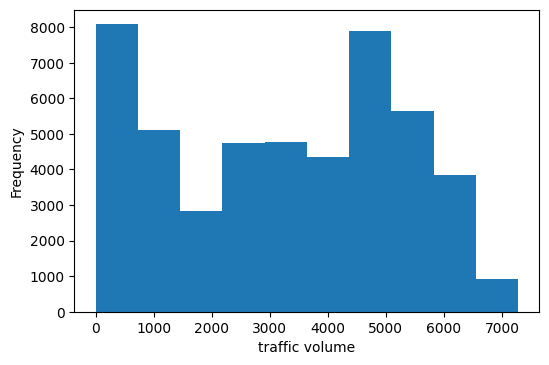

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
traffic['traffic_volume'].plot.hist()
traffic['traffic_volume'].describe()
plt.xlabel('traffic volume')

There is a high frequency of traffic volume at 0-500 and a high frequency of the traffic volume at 4500-5000. I think daytime and nightime could influence traffic volume because a lot less people would be driving at night, leading to the irregular distribution of the high frequencies at 0-500 and 4500-5000.

To look into how day and night correlate with traffic volume, I am separating the dataset by daytime hours (7am-7pm) and nighttime hours (7pm-7am).
To do this, I first transform the date_time column to datetime.

In [15]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
bool_day = (traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)
daytime_hours = traffic[bool_day]
daytime_hours.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [16]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
nighttime_hours = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour <= 7)]
nighttime_hours.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


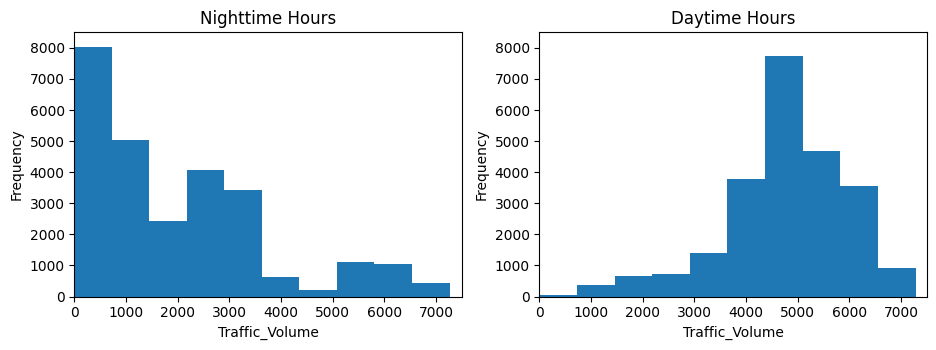

In [17]:
plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
nighttime_hours['traffic_volume'].plot.hist()
plt.title('Nighttime Hours')
plt.xlabel('Traffic_Volume')
plt.xlim(0,7500)
plt.ylim(0,8500)

plt.subplot(1,2,2)
daytime_hours['traffic_volume'].plot.hist()
plt.title('Daytime Hours')
plt.xlabel('Traffic_Volume')
plt.xlim(0,7500)
plt.ylim(0,8500)
plt.show()

In [18]:
nighttime_hours['traffic_volume'].describe()

count    26406.000000
mean      2018.015375
std       1713.201969
min          0.000000
25%        581.000000
50%       1485.000000
75%       2934.000000
max       7260.000000
Name: traffic_volume, dtype: float64

In [19]:
daytime_hours['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The nighttime hours are skewed left, while the Daytime hours are more skewed to the right. Thi is also reflected on the above statistics. So, there is more frequently a higher traffic volume during the day than at night. Because we are looking at indicators of heavy traffic, it may make more sense to focus on the daytime data, since there is less data to work with for the nighttime data because the highest frequence of traffic volume is 0.

I'm going to get the monthly traffic volume averages

<ipython-input-22-88bc34795444>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



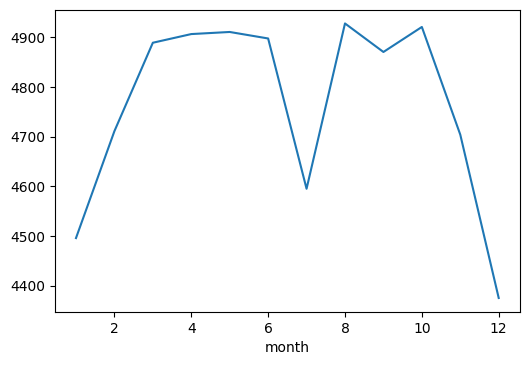

In [22]:
daytime_hours['month'] = daytime_hours['date_time'].dt.month
by_month = daytime_hours.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

In the above graph, the traffic volume is the lowest during the colder months and is highest during warmer weather with the exception of July. Next, I will look at traffic volume at different days, where 0 is Monday and 6 is Sunday.

<ipython-input-25-f283b9646288>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



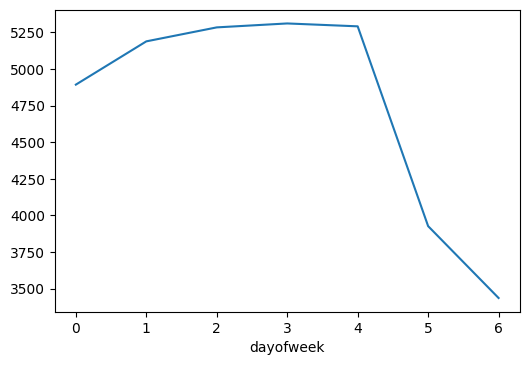

In [25]:
daytime_hours['dayofweek'] = daytime_hours['date_time'].dt.dayofweek
by_dayofweek = daytime_hours.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

It looks like the traffic volume is higher on working days compared to the weekend.

I am now looking at traffic volume during the day to see how it varies with the time. Because the traffic volume is low on the weekends it will scew the data, so I will seperate the buissness days from the weekends.

<ipython-input-41-f953a1ef0677>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



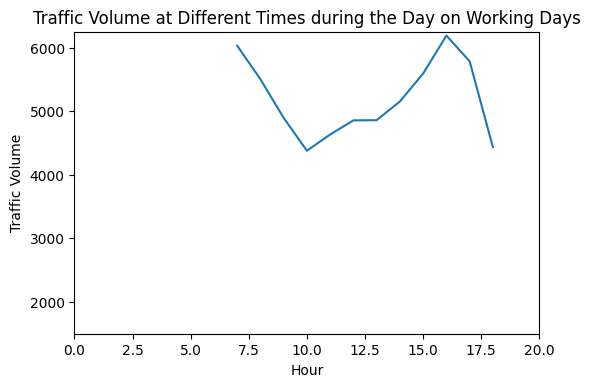

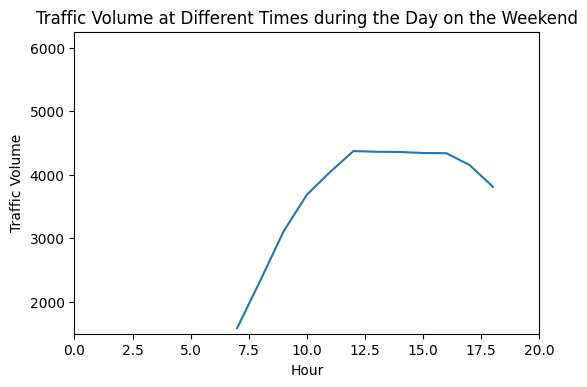

In [41]:
daytime_hours['hour'] = daytime_hours['date_time'].dt.hour
bussiness_days = daytime_hours.copy()[daytime_hours['dayofweek'] <= 4]
weekend = daytime_hours.copy()[daytime_hours['dayofweek']>=5]
by_hour_bussiness = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()
by_hour_bussiness['traffic_volume'].plot.line()
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume at Different Times during the Day on Working Days')
plt.xlim(0,20)
plt.ylim(1500,6250)
plt.show()
by_hour_weekend['traffic_volume'].plot.line()
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume at Different Times during the Day on the Weekend')
plt.xlim(0,20)
plt.ylim(1500,6250)
plt.show()

During the working days, the weekend the most popular time are at 7:30am and around 4pm which correlates roughly for when people go and come home from work. During the week, the traffic volume slowly peaks at 12:30pm and then stays steady before decreasing at around 3:30.

I am going to look at the correlation between traffic volume and weather conditions. I will look at the correlation between the two variables on the numerical weather columns namely, temp, rain_1h, snow_1h, clouds_all.

In [51]:
daytime_hours.corr()[['temp','rain_1h','snow_1h','clouds_all']]

,temp,rain_1h,snow_1h,clouds_all
temp,1.000000,0.010815,-0.019286,-0.135519
rain_1h,0.010815,1.000000,-0.000091,0.004993
snow_1h,-0.019286,-0.000091,1.000000,0.027721
clouds_all,-0.135519,0.004993,0.027721,1.000000
traffic_volume,0.128317,0.003697,0.001265,-0.032932
month,0.222072,0.001176,0.026768,0.000595
dayofweek,0.000188,-0.009683,-0.008814,-0.041980
hour,0.162691,0.008279,0.003923,0.023685


The correlation between traffic volume and any of the weather variables is pretty low, but the highest appears to be temperature. As a result, I will make a scatter plot of traffic volume to traffic volumes

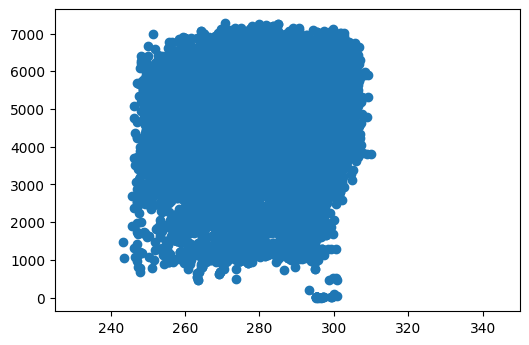

In [54]:
plt.scatter(daytime_hours['temp'],daytime_hours['traffic_volume'])
plt.xlim(225,350)
plt.show()

As I predicted based on the peason coefficient, it doesn't seem like there is much of correlation between temperature and traffic volume.

Now, I will look at the description of weather by first plotting the traffic volume against the weather_main and the weather_description.

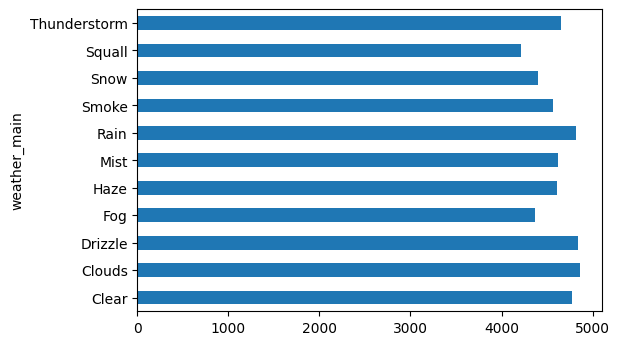

In [59]:
by_weather_main = daytime_hours.groupby('weather_main').mean()
by_weather_description = daytime_hours.groupby('weather_description').mean()
by_weather_main['traffic_volume'].plot.barh()

There does not seem to be a large difference in traffic depending on the weather.

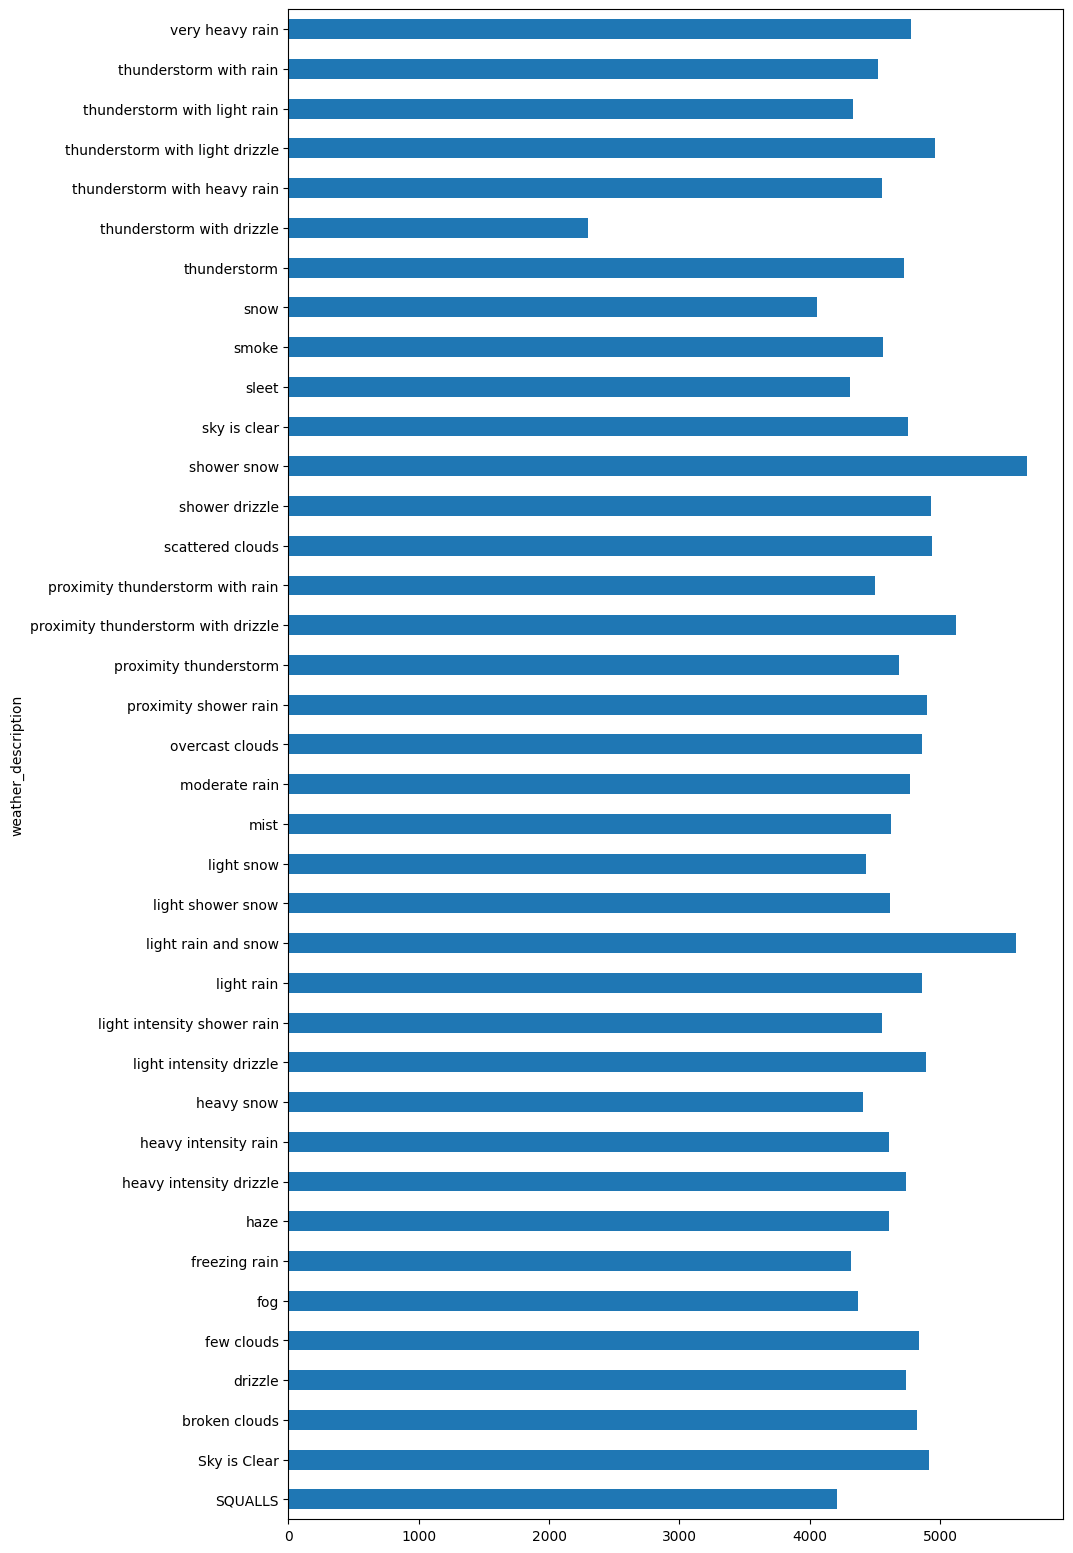

In [64]:
plt.figure(figsize=(10,20))
by_weather_description['traffic_volume'].plot.barh()
plt.show()

There doesn't appear to be much of a correlation. THe shower snow and light rain and snow are the largest.